In [2]:
%matplotlib inline

In [47]:
import os
import numpy as np
import pandas as pd
from IPython.display import display

In [8]:
from importlib import reload
import rsenv
RSENV_DIR = os.path.dirname(rsenv.__file__)
EXAMPLE_DATA_DIR = os.path.join(os.path.dirname(RSENV_DIR), 'examples', 'example_data')
from rsenv.data_analysis.nanodrop import denovix

In [32]:
reload(denovix)

print(rsenv.__file__)
print(RSENV_DIR)
print(EXAMPLE_DATA_DIR)

fn = os.path.join(EXAMPLE_DATA_DIR, 'denovix', 'report_53.538.csv')

df, metadata = denovix.csv_to_dataframe(fn)


c:\users\rasse\dev\rsenv\rsenv\__init__.py
c:\users\rasse\dev\rsenv\rsenv
c:\users\rasse\dev\rsenv\examples\example_data
len(y_vals): 10
len(metadata): 10
len(columns): 10
len(x_vals): 651
y_vals.shape (10, 651)


In [62]:
# rows of columns
# columns do not have to be unique.
# index, in general, does not have to be unique.
testdf = pd.DataFrame(data=[np.arange(10), np.arange(10, 20)], columns=list('aabbcdefghijklmn'[:10]), index=[1, 1])
# selecting non-unique locations will select all matching columns/rows.
testdf['a']  # [col]
testdf.loc[1, 'a']  # [rows, cols]


,a,a
1,0,1
1,10,11


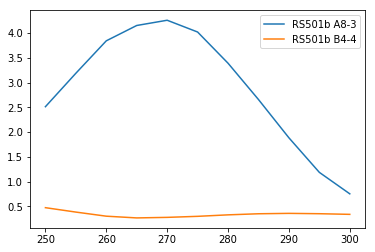

In [52]:
# pd.DataFrame(data=[np.arange(10), np.arange(10, 20)], columns=list('abcdefghijklmn'[:2]), index=np.arange(2, 12))

# With Pandas, you first select the data, then plot:
# df.plot(y=['RS501b A8-3', 'RS501b B4-4'])  # no.

df[['RS501b A8-3', 'RS501b B4-4']]  # default is to get column by name;
# To get a selection of rows: df.loc[rows, cols]
display(df.loc[250:300:5, ['RS501b A8-3', 'RS501b B4-4']])
# Use df.iloc to by-pass the axis index (rows, cols) and use numeric, zero-based index:
display(df.iloc[20:30, [1, 2]])



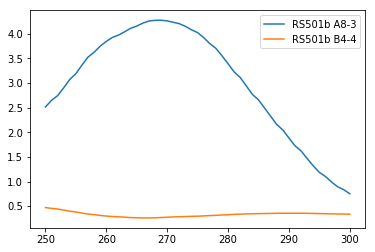

In [54]:
df.loc[250:300, ['RS501b A8-3', 'RS501b B4-4']].plot()


In [65]:
import shlex

names = df.columns
nidxs = list(range(len(names)))
print(df.columns)

requested = 'all -1 -"RS501b A8-3"'
requested = shlex.split(requested_cols)

selected = []  # numeric, indices

def value_to_idxs(value):
    try:
        idxs = [int(value)]
    except ValueError:
        if value.startswith('/'):
            # Javascript-like regex definition
            pass
        else:
            idx = names.
        

for request in requested:
    if request == 'all':
        selected.extend(names)
    elif request[0] == '-':
        request = request[1:]
        

print(requested_cols)



Index(['RS501b A8-3', 'RS501b B4-4', 'RS501b C10-5', 'RS501b D12-6',
       'RS501b D9-8', 'RS501c A7 df20-10', 'RS501c C9C10 df20-11',
       'RS501c C11 df20-12', 'RS501c C12D12 df20-13', 'RS501c D10D9 df20-14'],
      dtype='object')
['all', '-1', '-RS501b A8-3']


In [66]:
int('s')

ValueError: invalid literal for int() with base 10: 's'